In [1]:
import pandas as pd
from fbprophet import Prophet
import time
from datetime import datetime as dt
from datetime import timedelta as td

In [2]:
class Predictor():
    def __init__(self, currency):
        self.currency = currency
        self.model = Prophet(yearly_seasonality=False, daily_seasonality=False)
        assert type(self.currency) == str

    def make_model(self):
        curr = dt.today()
        one_year_ago = curr - td(days=365)
        
        curr = curr.strftime("%Y%m%d")
        one_year_ago = one_year_ago.strftime("%Y%m%d")
        
        market_info = pd.read_html("https://coinmarketcap.com/currencies/" + self.currency + "/historical-data/?start=" + one_year_ago + "&end=" + curr)[0]
        market_info.drop(market_info.columns[[1, 2, 3, 5, 6]], axis=1, inplace=True)
        market_info = market_info.assign(Date=pd.to_datetime(market_info['Date']))
        market_info.columns = ['ds', 'y']
        
        print("Fitting data...")
        start = time.time()
        self.model.fit(market_info)
        print("Compiled in", time.time()-start, "seconds.")
    
    def predict(self, days):
        future = self.model.make_future_dataframe(periods=days)
        forecast = self.model.predict(future)
        return self.model.plot_components(forecast)
        
        
        

Fitting data...
Compiled in 0.190871000289917 seconds.


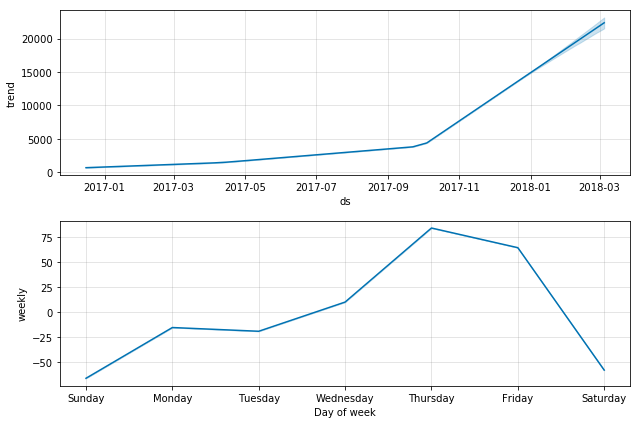

In [3]:
bitcoin_predictor = Predictor("bitcoin")
bitcoin_predictor.make_model()
bitcoin_predictor.predict(80)

Fitting data...
Compiled in 0.4106123447418213 seconds.


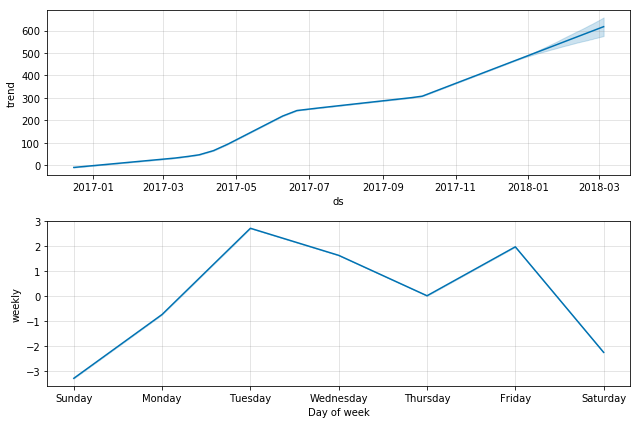

In [4]:
ethereum_predictor = Predictor("ethereum")
ethereum_predictor.make_model()
ethereum_predictor.predict(80)